In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [6]:
getChar = ['h', 'i', 'e', 'l', 'o']

x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

y_data = [1, 0, 2, 3, 3, 4]    # ihello

inputs = Variable(torch.LongTensor(x_data))
labels = Variable(torch.LongTensor(y_data))

In [7]:
num_classes = 5
input_size = 5
hidden_size = 5
batch_size = 1
seq_length = 6
num_layers = 1
embedding_size=5
class Model(nn.Module):

    def __init__(self,num_classes, input_size, hidden_size, num_layers):
        super(Model, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.LSTM(input_size=embedding_size, hidden_size=hidden_size,
                           num_layers= num_layers, batch_first=True)
        self.ln= nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):        
        h = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        emb = self.embedding(x)
        emb = emb.view(batch_size, seq_length, -1)
        out, hidden = self.rnn(emb, (h, c))
        out= out.view(-1, self.hidden_size)
        out= self.ln(out)
        return hidden, out

String:['l', 'h', 'l', 'h', 'h', 'h'] , epoch: 1, loss: 1.592 
String:['l', 'l', 'l', 'l', 'l', 'l'] , epoch: 2, loss: 1.486 
String:['l', 'l', 'l', 'l', 'l', 'l'] , epoch: 3, loss: 1.358 
String:['l', 'l', 'l', 'l', 'l', 'o'] , epoch: 4, loss: 1.224 
String:['l', 'l', 'e', 'l', 'l', 'o'] , epoch: 5, loss: 1.070 
String:['i', 'l', 'e', 'l', 'l', 'o'] , epoch: 6, loss: 0.908 
String:['i', 'i', 'e', 'l', 'l', 'o'] , epoch: 7, loss: 0.766 
String:['i', 'i', 'e', 'l', 'l', 'o'] , epoch: 8, loss: 0.662 
String:['i', 'i', 'e', 'l', 'l', 'o'] , epoch: 9, loss: 0.585 
String:['i', 'i', 'e', 'l', 'l', 'o'] , epoch: 10, loss: 0.523 
String:['i', 'i', 'e', 'l', 'l', 'o'] , epoch: 11, loss: 0.473 
String:['i', 'h', 'e', 'l', 'l', 'o'] , epoch: 12, loss: 0.433 
String:['i', 'h', 'e', 'l', 'l', 'o'] , epoch: 13, loss: 0.393 
String:['i', 'h', 'e', 'l', 'l', 'o'] , epoch: 14, loss: 0.354 
String:['i', 'h', 'e', 'l', 'l', 'o'] , epoch: 15, loss: 0.309 
String:['i', 'h', 'e', 'l', 'l', 'o'] , epoch: 16

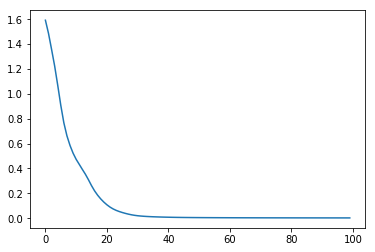

In [8]:
model = Model(num_classes, input_size, hidden_size, num_layers)
#print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-1)
# Train the model
ar_visualLoss=[]
for epoch in range(100):
    model.train()
    _, outputs = model(inputs)
    optimizer.zero_grad()
    loss = criterion(outputs, labels.view(-1))
    ar_visualLoss.append(loss)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(1)
    idx = idx.data.numpy()
    pred = [getChar[i] for i in idx.squeeze()]
    
    print("String:{} , epoch: {}, loss: {:.3f} ".format(pred, epoch + 1, loss.data))
plt.plot(ar_visualLoss)